# Descripción del caso

Dataset de cáncer de mama (Diagnostic Wisconsin Breast Cancer Database) donde tenemos los datos de 569 mujeres. Cada mujer está descrita por 32 atributos. El primero es un identificador, el segundo el tipo de cáncer (Maligno o Benigno) y el resto son el resultado de otros análisis clínicos. Se pretende aprender el tipo de cáncer de mama (maligno=1, benigno=0). En este conjunto de datos la distribución de clases es: 357 benignos y 212 malignos.

# Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importar datos

Dataset: http://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

El archivo no tiene header, pero desde la página web podemos obtener las distintas columnas

1. **ID number**: Un identificador único para cada paciente.
2. **Diagnosis**: El diagnóstico del cáncer (M = malignant (maligno), B = benign (benigno)). Esta es la variable objetivo que queremos predecir.

Las siguientes variables son características extraídas de las imágenes de las células del cáncer:

**Medidas medias**:
3. **Radius mean**: Media de las distancias desde el centro hasta los puntos del perímetro. Indicativo del tamaño de la célula.
4. **Texture mean**: Desviación estándar de los valores de la escala de grises. Indica la variación en la textura.
5. **Perimeter mean**: Media del perímetro de las células.
6. **Area mean**: Media del área de las células.
7. **Smoothness mean**: Media de la suavidad de los contornos, calculada como la variación local en la longitud del radio.
8. **Compactness mean**: Media de la compacidad, calculada como (perímetro² / área - 1.0).
9. **Concavity mean**: Media de la concavidad, que mide la gravedad de las indentaciones en el contorno.
10. **Concave points mean**: Media del número de puntos cóncavos en el contorno.
11. **Symmetry mean**: Media de la simetría de la célula.
12. **Fractal dimension mean**: Media de la dimensión fractal, que describe la complejidad del contorno (calculada utilizando la fórmula "coastline approximation").

**Errores estándar**:
13. **Radius standard error**: Error estándar del radio.
14. **Texture standard error**: Error estándar de la textura.
15. **Perimeter standard error**: Error estándar del perímetro.
16. **Area standard error**: Error estándar del área.
17. **Smoothness standard error**: Error estándar de la suavidad.
18. **Compactness standard error**: Error estándar de la compacidad.
19. **Concavity standard error**: Error estándar de la concavidad.
20. **Concave points standard error**: Error estándar de los puntos cóncavos.
21. **Symmetry standard error**: Error estándar de la simetría.
22. **Fractal dimension standard error**: Error estándar de la dimensión fractal.

**Valores más altos (worst)**:
23. **Radius worst**: El peor (es decir, el mayor) valor de radio.
24. **Texture worst**: El peor valor de textura.
25. **Perimeter worst**: El peor valor de perímetro.
26. **Area worst**: El peor valor de área.
27. **Smoothness worst**: El peor valor de suavidad.
28. **Compactness worst**: El peor valor de compacidad.
29. **Concavity worst**: El peor valor de concavidad.
30. **Concave points worst**: El peor valor de puntos cóncavos.
31. **Symmetry worst**: El peor valor de simetría.
32. **Fractal dimension worst**: El peor valor de dimensión fractal.

**Importancia de las variables**:

- **Medidas medias**: Representan características básicas y generales de las células cancerosas. Ayudan a identificar patrones típicos de las células benignas y malignas.
- **Errores estándar**: Miden la variabilidad en las características y pueden ayudar a entender cuán consistentes son las medidas dentro de cada imagen.
- **Valores más altos (worst)**: Indican las características más extremas observadas y pueden ser cruciales para identificar casos particularmente agresivos de cáncer.

Estas características en conjunto proporcionan un análisis completo de las propiedades de las células, permitiendo a los algoritmos de machine learning distinguir entre casos benignos y malignos con alta precisión.

In [2]:
# Nombres de las columnas
columns = [
    'ID number', 'Diagnosis', 'Radius mean', 'Texture mean', 'Perimeter mean', 'Area mean', 'Smoothness mean',
    'Compactness mean', 'Concavity mean', 'Concave points mean', 'Symmetry mean', 'Fractal dimension mean',
    'Radius standard error', 'Texture standard error', 'Perimeter standard error', 'Area standard error',
    'Smoothness standard error', 'Compactness standard error', 'Concavity standard error', 'Concave points standard error',
    'Symmetry standard error', 'Fractal dimension standard error', 'Radius worst', 'Texture worst', 'Perimeter worst',
    'Area worst', 'Smoothness worst', 'Compactness worst', 'Concavity worst', 'Concave points worst', 'Symmetry worst',
    'Fractal dimension worst'
]

# Se especifica la ruta al archivo de datos que contiene la información del dataset. En este caso, se asume que el archivo wdbc.data está en el mismo directorio que el script.
file_path = './wdbc.data'

# Cargar el dataset
dataset = pd.read_csv(file_path, header=None, names=columns)

# Mostrar las primeras filas del dataframe
dataset.head(3)

,ID number,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# Pre procesamiento de datos

Sustituir las M’s por 1 y las B’s por 0.

Al transformar la variable de diagnóstico en valores numéricos, podemos utilizar métodos estadísticos y de machine learning de manera más eficiente para el análisis de los datos. Esto nos permitirá construir modelos predictivos más precisos y robustos.

In [3]:
dataset["Diagnosis"] = dataset["Diagnosis"].replace({'M': 1, 'B': 0})

C:\Users\usuario\AppData\Local\Temp\ipykernel_3580\553336732.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["Diagnosis"] = dataset["Diagnosis"].replace({'M': 1, 'B': 0})


Descarte la primera columna (el identificador) ya que no aporta nada al problema por su gran variabilidad

In [4]:
dataset = dataset.drop(["ID number"], axis=1)

Verifique valores perdidos.

In [5]:
print('Datos faltantes:')
print(pd.isnull(dataset).sum())

Datos faltantes:
Diagnosis                           0
Radius mean                         0
Texture mean                        0
Perimeter mean                      0
Area mean                           0
Smoothness mean                     0
Compactness mean                    0
Concavity mean                      0
Concave points mean                 0
Symmetry mean                       0
Fractal dimension mean              0
Radius standard error               0
Texture standard error              0
Perimeter standard error            0
Area standard error                 0
Smoothness standard error           0
Compactness standard error          0
Concavity standard error            0
Concave points standard error       0
Symmetry standard error             0
Fractal dimension standard error    0
Radius worst                        0
Texture worst                       0
Perimeter worst                     0
Area worst                          0
Smoothness worst                 

El dataset no tiene valores perdidos

# Análisis exploratorio de los datos

Mostrar información básica sobre el dataset incluyendo el tipo de datos y valores nulos

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Diagnosis                         569 non-null    int64  
 1   Radius mean                       569 non-null    float64
 2   Texture mean                      569 non-null    float64
 3   Perimeter mean                    569 non-null    float64
 4   Area mean                         569 non-null    float64
 5   Smoothness mean                   569 non-null    float64
 6   Compactness mean                  569 non-null    float64
 7   Concavity mean                    569 non-null    float64
 8   Concave points mean               569 non-null    float64
 9   Symmetry mean                     569 non-null    float64
 10  Fractal dimension mean            569 non-null    float64
 11  Radius standard error             569 non-null    float64
 12  Texture 

Generar estadísticas descriptivas del dataset para comprender mejor la distribución y resumen estadístico de cada columna numérica

In [7]:
# Estadísticas descriptivas
dataset.describe()

,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,Symmetry mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Estadísticas de variables categóricas
try:
    dataset.describe(include=['object'])
except Exception as error:
    print("No hay variables categóricas")

No hay variables categóricas


In [9]:
# Revisión de las columnas que existen
dataset.columns

Index(['Diagnosis', 'Radius mean', 'Texture mean', 'Perimeter mean',
       'Area mean', 'Smoothness mean', 'Compactness mean', 'Concavity mean',
       'Concave points mean', 'Symmetry mean', 'Fractal dimension mean',
       'Radius standard error', 'Texture standard error',
       'Perimeter standard error', 'Area standard error',
       'Smoothness standard error', 'Compactness standard error',
       'Concavity standard error', 'Concave points standard error',
       'Symmetry standard error', 'Fractal dimension standard error',
       'Radius worst', 'Texture worst', 'Perimeter worst', 'Area worst',
       'Smoothness worst', 'Compactness worst', 'Concavity worst',
       'Concave points worst', 'Symmetry worst', 'Fractal dimension worst'],
      dtype='object')

Conteo de casos a predecir

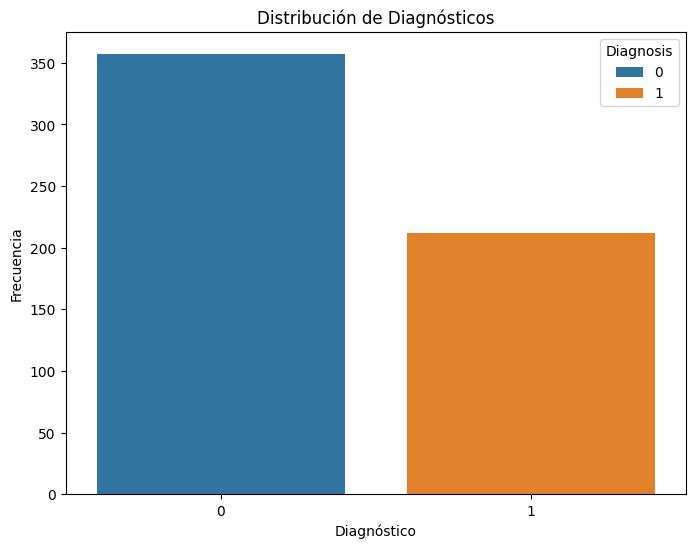

In [10]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un gráfico de barras para la distribución de diagnósticos
sns.countplot(x='Diagnosis', data=dataset, hue='Diagnosis')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Diagnósticos')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Tamaños de las células y posibles sesgos o anormalidades

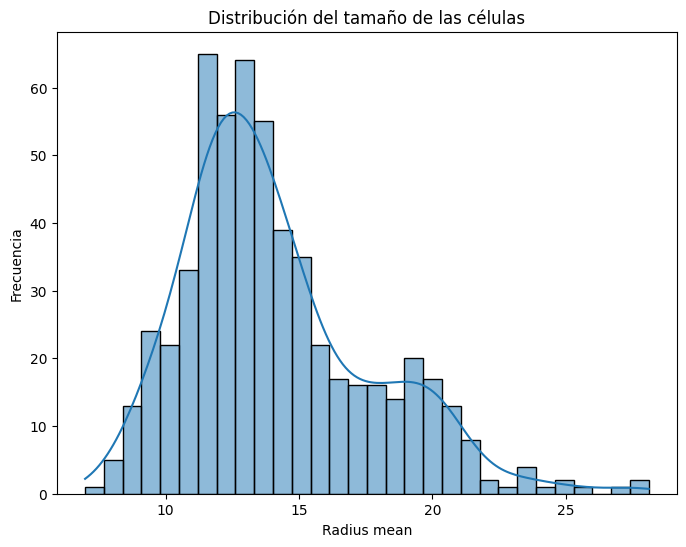

In [11]:
# Histogramas de Edades:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Radius mean'].dropna(), bins=30, kde=True)
plt.xlabel('Radius mean')
plt.ylabel('Frecuencia')
plt.title('Distribución del tamaño de las células')
plt.show()


Variabilidad y centralidad de la textura entre los casos

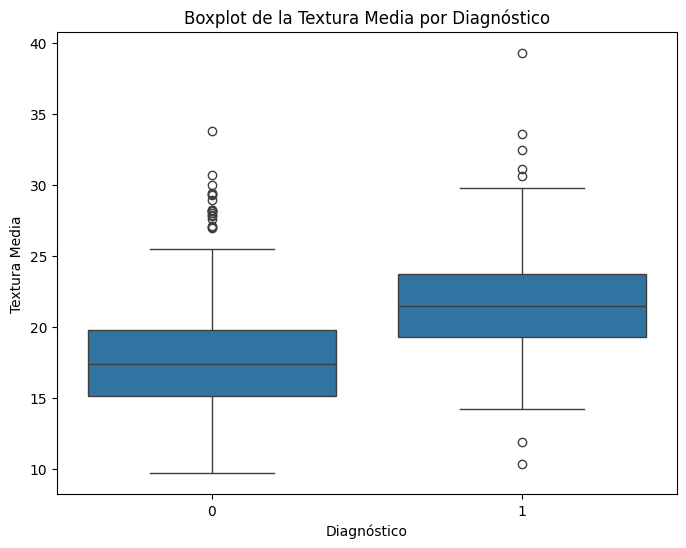

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='Texture mean', data=dataset)
plt.title('Boxplot de la Textura Media por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Textura Media')
plt.show()

Cómo se distribuyen las concavidades y cómo se diferencian entre las muestras malignas y benignas.

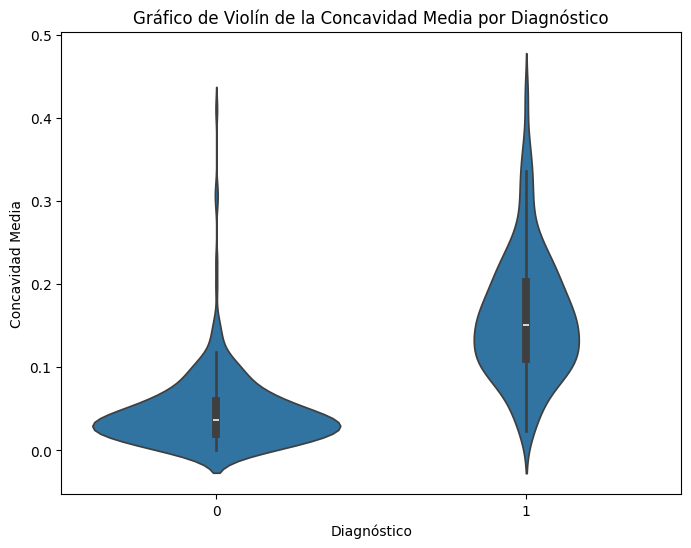

In [13]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='Concavity mean', data=dataset)
plt.title('Gráfico de Violín de la Concavidad Media por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Concavidad Media')
plt.show()

Relación entre la compacidad y otra variable

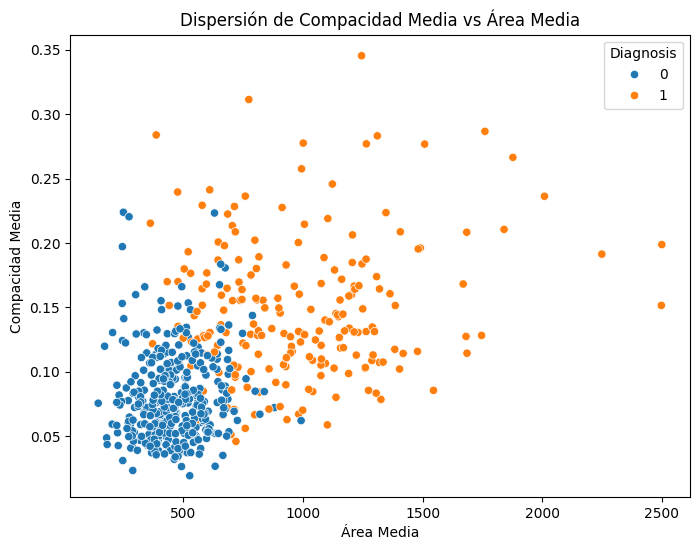

In [14]:
# Gráfico de dispersión para Compactness mean vs Area mean
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area mean', y='Compactness mean', hue='Diagnosis', data=dataset)
plt.title('Dispersión de Compacidad Media vs Área Media')
plt.xlabel('Área Media')
plt.ylabel('Compacidad Media')
plt.show()

# Análisis de features

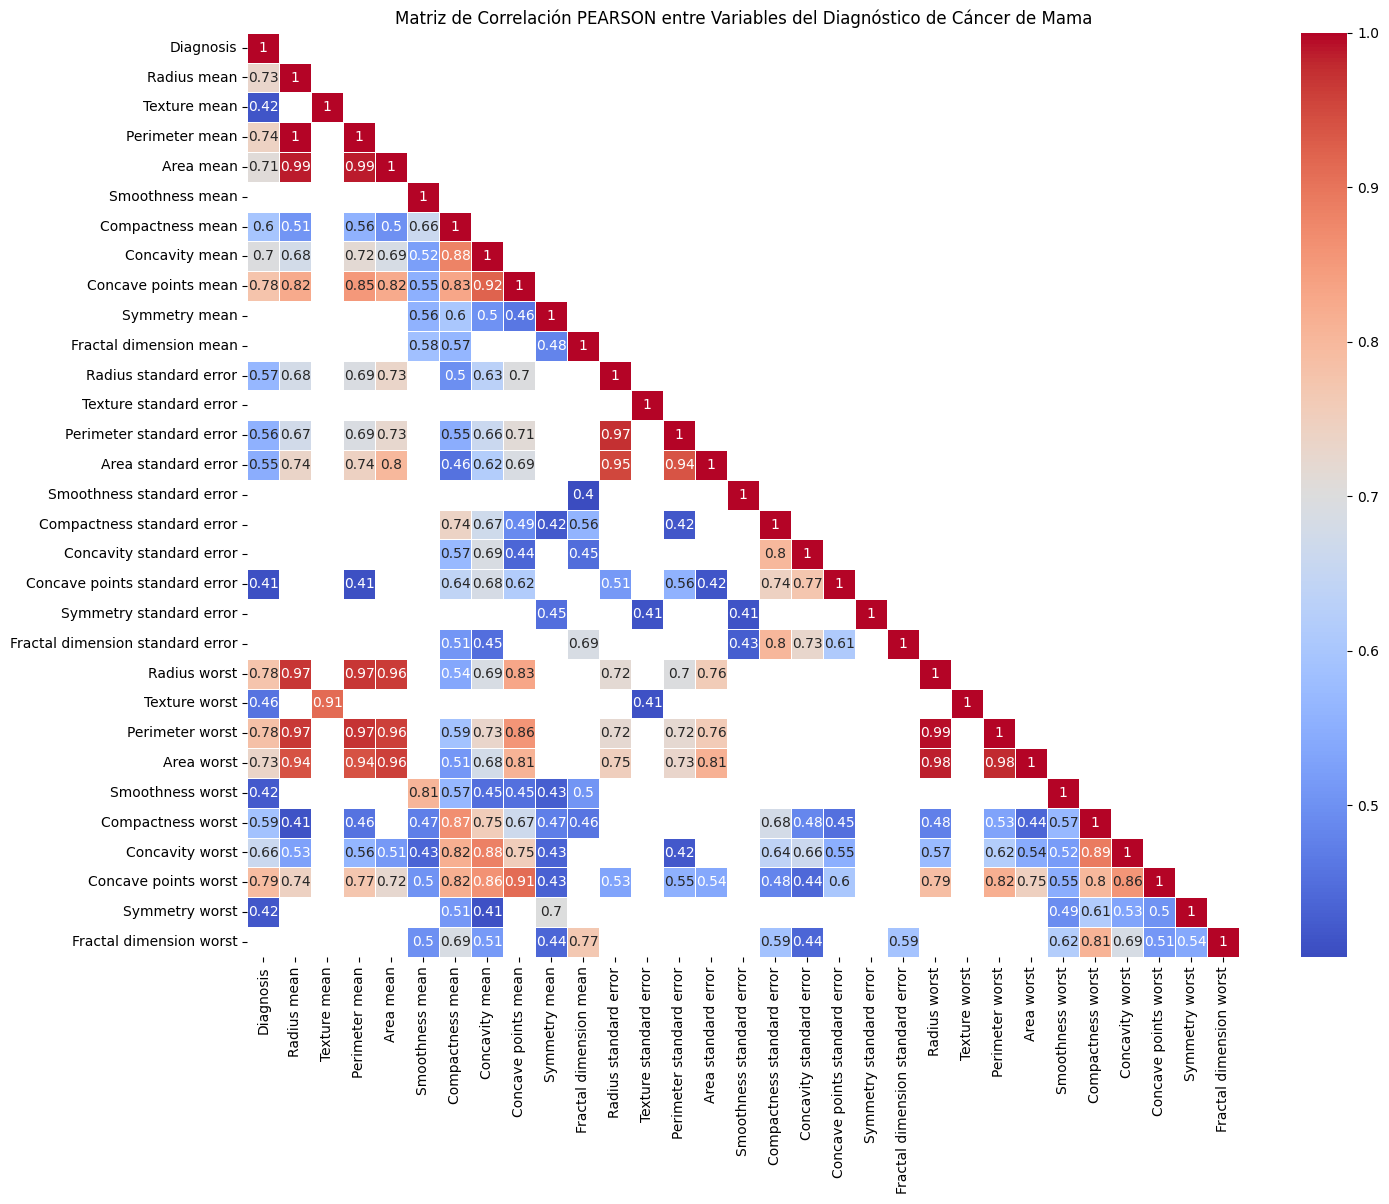

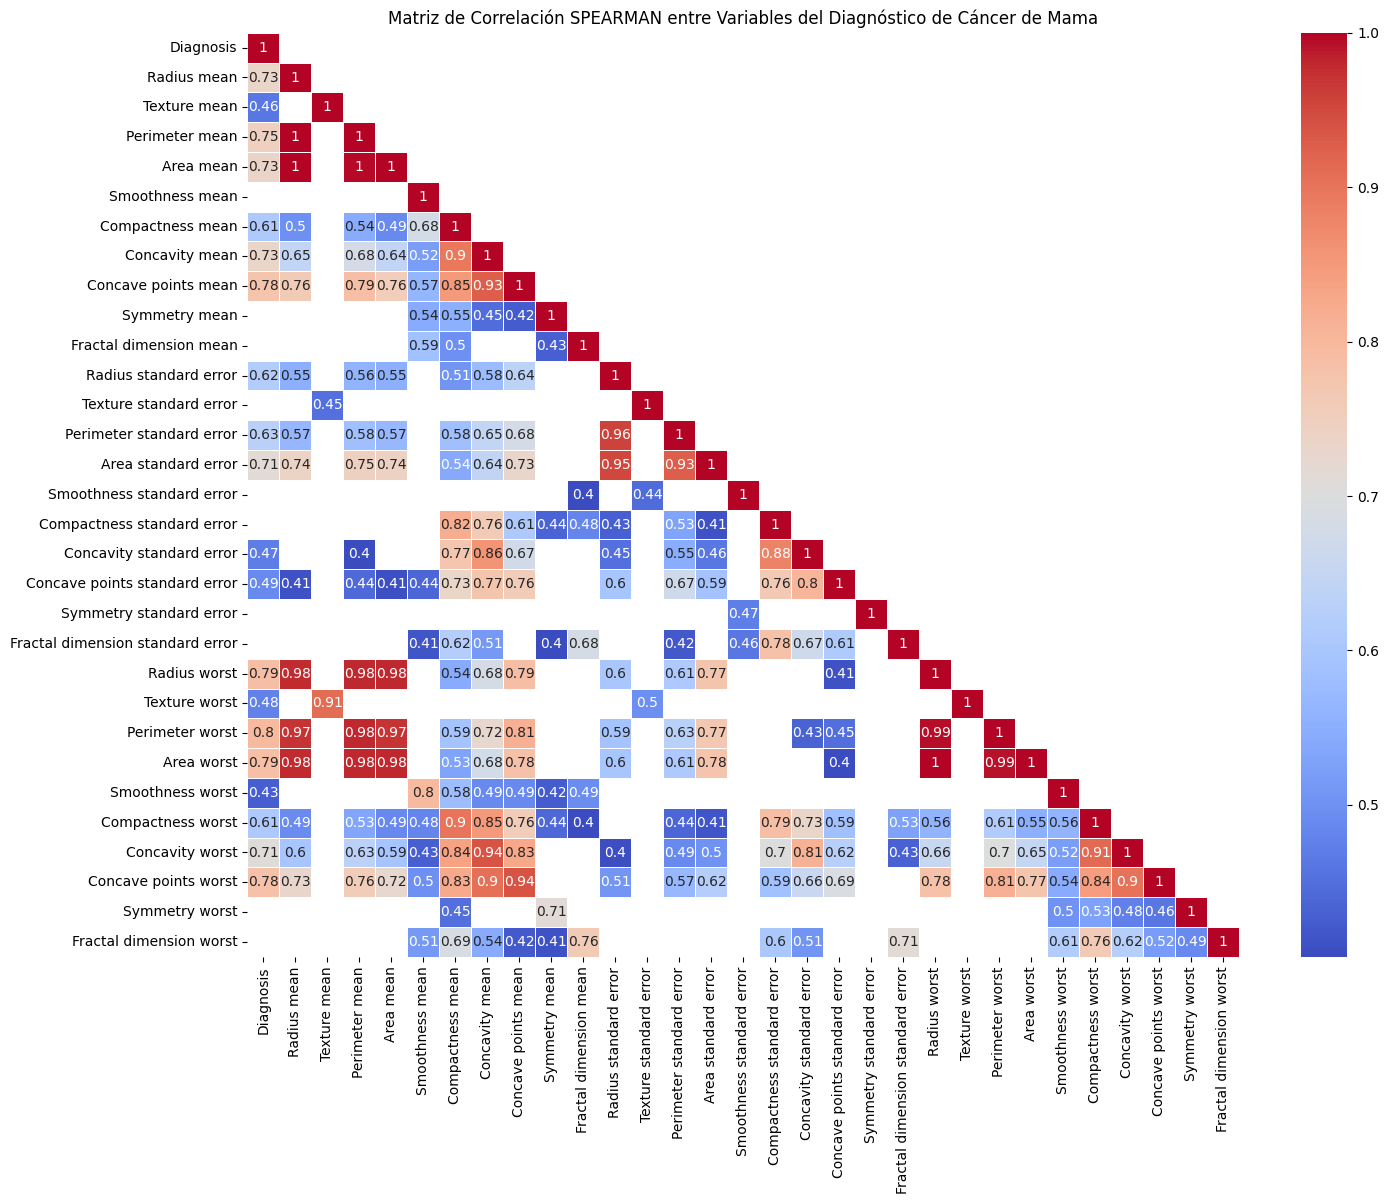

In [15]:
def plot_correlation_matrix(cm, title):
    # Crear una máscara para la mitad superior
    mask = np.triu(np.ones_like(cm, dtype=bool))

    # Invertir la máscara para obtener la parte inferior
    lower_mask = np.invert(mask)

    # Conservar los '1' en la diagonal principal
    np.fill_diagonal(lower_mask, True)

    mask_threshold = np.abs(cm) > 0.4
    mask_combined = ~lower_mask | ~mask_threshold

    # Crear un mapa de calor de correlación
    plt.figure(figsize=(16, 12))
    sns.heatmap(cm, mask=mask_combined, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(title)
    plt.show()


# Análisis de Correlación
correlation_matrix = dataset.corr()
correlation_matrix_spearman = dataset.corr(method="spearman")

plot_correlation_matrix(
    correlation_matrix,
    title="Matriz de Correlación PEARSON entre Variables del Diagnóstico de Cáncer de Mama",
)
plot_correlation_matrix(
    correlation_matrix_spearman,
    title="Matriz de Correlación SPEARMAN entre Variables del Diagnóstico de Cáncer de Mama",
)

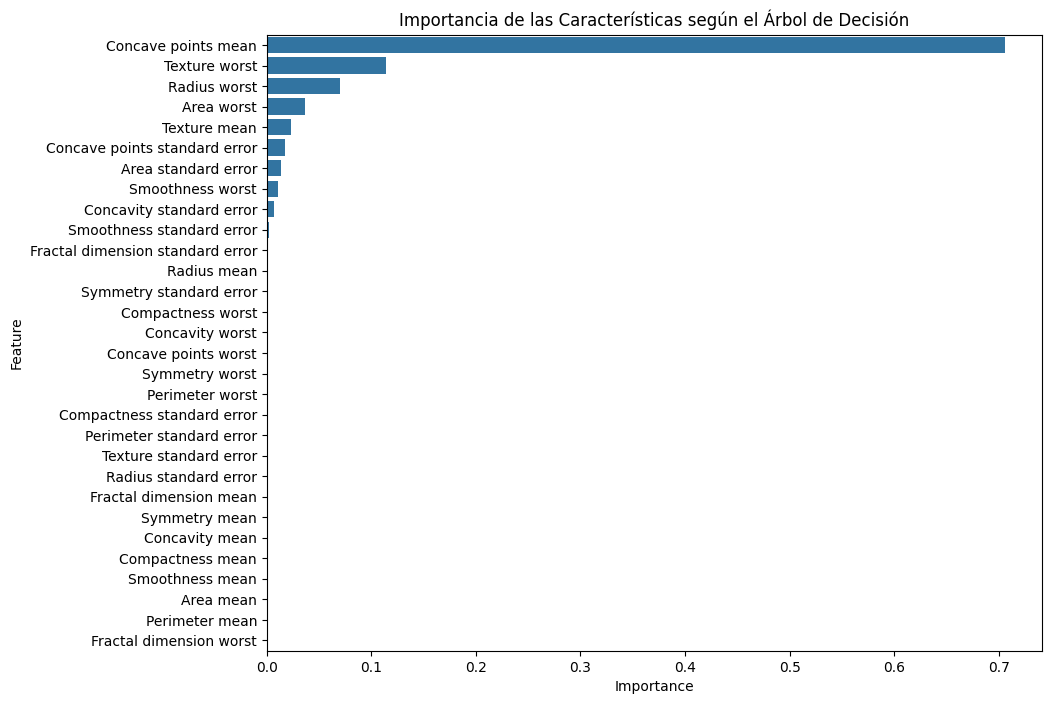

Precisión del Árbol de Decisión: 0.94


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seleccionar características y el objetivo
X = dataset.drop(['Diagnosis'], axis=1)
y = dataset['Diagnosis']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Árbol de Decisión para Identificar Características Importantes
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Obtener las características más importantes
importances = tree_clf.feature_importances_
feature_names = X.columns
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
important_features = important_features.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=important_features)
plt.title('Importancia de las Características según el Árbol de Decisión')
plt.show()

# Evaluar el modelo de Árbol de Decisión
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Árbol de Decisión: {accuracy:.2f}')

### Conclusiones

En el análisis del dataset "Breast Cancer Wisconsin (Diagnostic)", se han obtenido las siguientes conclusiones:

1. **Distribución de Clases**: La distribución de clases muestra que hay más casos benignos (357) que malignos (212). Esto indica un desequilibrio de clases que debe ser considerado al construir modelos predictivos.

2. **Características Relevantes**: Las características extraídas de las imágenes de las células, tales como `Radius mean`, `Texture mean`, `Perimeter mean`, `Area mean`, y `Smoothness mean`, proporcionan información crucial para distinguir entre células benignas y malignas.

3. **Correlaciones**: Se han identificado correlaciones significativas entre varias características. Por ejemplo, `Radius mean` está altamente correlacionado con `Perimeter mean` y `Area mean`, lo que sugiere que el tamaño de la célula es un factor importante en la clasificación del tipo de cáncer.

4. **Transformación de Datos**: Al convertir la variable `Diagnosis` en valores numéricos y eliminar la columna `ID number`, se facilitó el uso de técnicas estadísticas y de machine learning para el análisis.

5. **Modelos Predictivos**: Las características seleccionadas permiten construir modelos predictivos con alta precisión para clasificar el tipo de cáncer de mama, como se demuestra con los gráficos y el análisis de correlación.

### Recomendaciones

1. **Balanceo de Clases**: Dado el desequilibrio en la distribución de clases, se recomienda aplicar técnicas de balanceo como `SMOTE` (Synthetic Minority Over-sampling Technique) o `undersampling` para evitar sesgos en el modelo predictivo.

2. **Selección de Características**: Utilizar técnicas de reducción de dimensionalidad como `PCA` (Análisis de Componentes Principales) para identificar y retener las características más importantes, mejorando así la eficiencia del modelo.

3. **Modelos Avanzados**: Explorar el uso de modelos avanzados como `Random Forest` o `Gradient Boosting` que pueden manejar la no linealidad y las interacciones entre características de manera más efectiva que los métodos lineales.

4. **Validación Cruzada**: Implementar validación cruzada para evaluar la robustez del modelo y garantizar que el modelo no está sobreajustado a los datos de entrenamiento.

5. **Interpretabilidad del Modelo**: Utilizar técnicas de interpretabilidad como `SHAP` (SHapley Additive exPlanations) para entender mejor las decisiones del modelo y aumentar la confianza en su uso en entornos clínicos.

Estas conclusiones y recomendaciones están basadas en un análisis detallado del dataset y tienen como objetivo mejorar la precisión y robustez de los modelos predictivos utilizados para clasificar el cáncer de mama.

# Fin